## Clean CSV code like a basic clean

In [16]:
import pandas as pd

# Load the CSV into a DataFrame
file_path = 'dbird_data_Georgia_Tech_final(1).csv' 
dfoG = pd.read_csv(file_path)

# Check for duplicate rows
duplicate_rows = dfoG[dfoG.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Drop the columns 'notes' and 'image'
dfoG = dfoG.drop(columns=['notes', 'image', 'created_at_utc','updated_at_utc', 'location_accuracy_meters', 'mobile_device_gps_source'])


Number of duplicate rows: 0


In [17]:
# Convert 'observed_at_utc' column to datetime
dfoG['observed_at_utc'] = pd.to_datetime(dfoG['observed_at_utc'], format='mixed', errors='coerce')

# Format the datetime to only include the date (YYYY-MM-DD)
dfoG['observed_at_utc'] = dfoG['observed_at_utc'].dt.date

In [18]:
# Save the updated DataFrame back to a CSV if needed
dfoG.to_csv('updated_dbird.csv', index=False)


## Use the new cleaned CSV data to calculate everything

In [19]:
import pandas as pd

file_path = 'updated_dbird.csv'
df = pd.read_csv('updated_dbird.csv')

# Define latitude and longitude bounds
top_latitude = 33.77592
bottom_latitude = 33.77495
left_longitude = -84.40163
right_longitude = -84.40106



In [20]:
# Convert 'observed_at_utc' column to datetime
df['observed_at_utc'] = pd.to_datetime(df['observed_at_utc'], format='mixed', errors='coerce')

# Format the datetime to only include the date (YYYY-MM-DD)
df['observed_at_utc'] = df['observed_at_utc'].dt.date

In [21]:
# Filter rows within the latitude and longitude range
df_2024_within_bounds = df[
    (df['latitude'] <= top_latitude) &
    (df['latitude'] >= bottom_latitude) &
    (df['longitude'] >= left_longitude) &
    (df['longitude'] <= right_longitude)
]
# Rows in 2024 but outside bounds
df_2024_outside_bounds = df.drop(df_2024_within_bounds.index)

In [22]:
df_2024_within_bounds.to_csv('dbird_2024_within_bounds.csv', index=False)
df_2024_outside_bounds.to_csv('dbird_2024_outside_bounds.csv', index=False)

print("Files saved successfully!")

Files saved successfully!


In [23]:
df_2024_outside_bounds.to_csv('dbird_2024_outside_bounds.csv', index=False)

print("Files saved successfully!")

Files saved successfully!


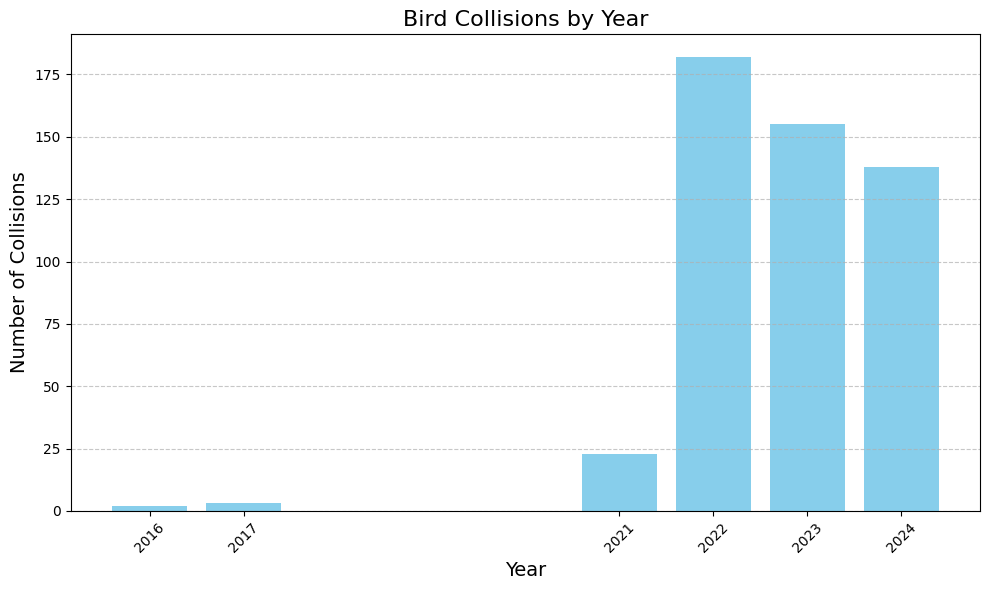

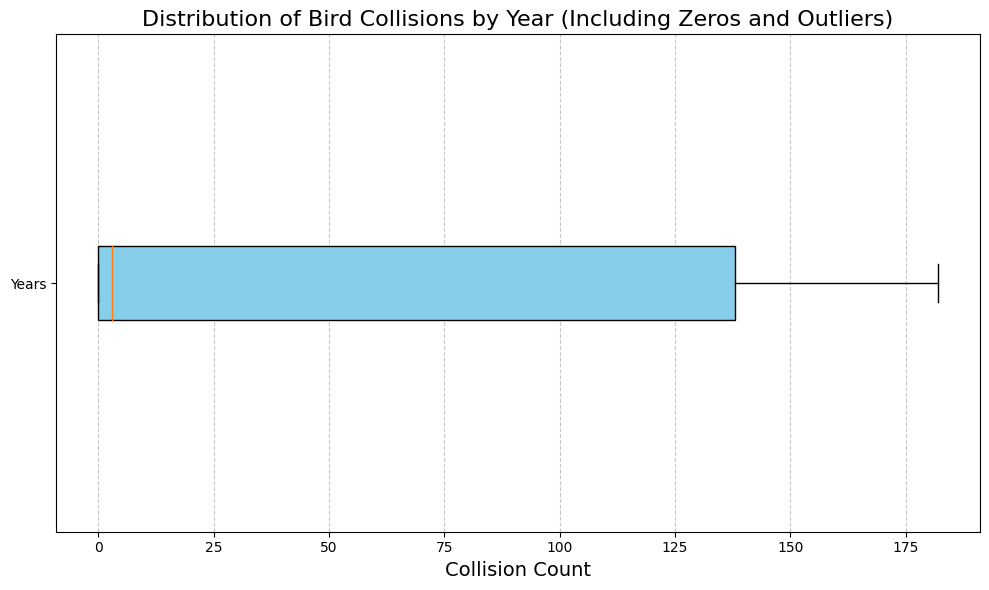

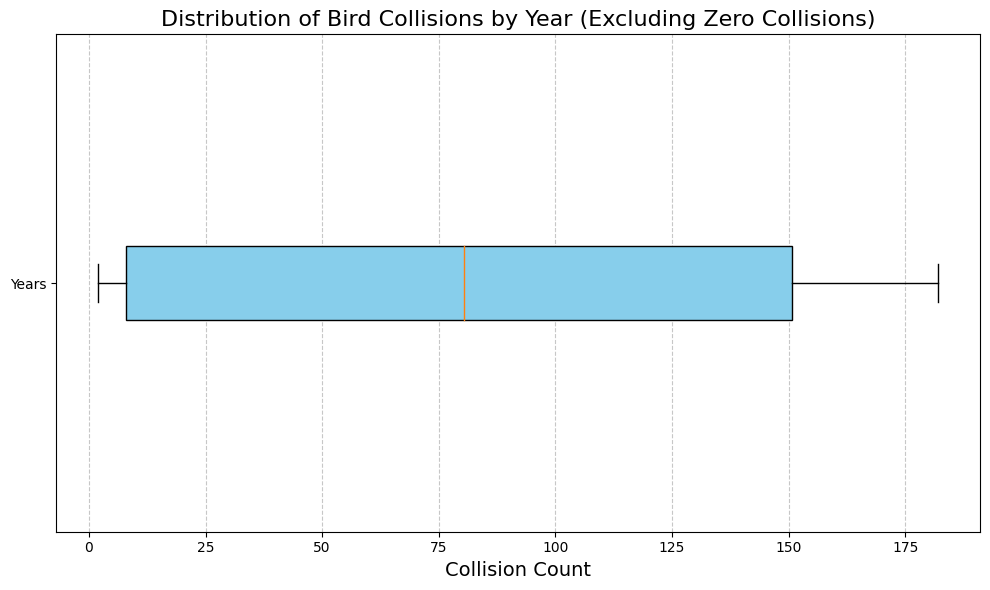

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file (replace 'file.csv' with your file's name)
data = pd.read_csv('updated_dbird.csv')

# Step 2: Convert 'observed_at_utc' to datetime format
data['observed_at_utc'] = pd.to_datetime(data['observed_at_utc'])

# Step 3: Extract year and month from the 'observed_at_utc' column
data['Year'] = data['observed_at_utc'].dt.year
data['Month'] = data['observed_at_utc'].dt.month

# Step 4: Ensure the data is sorted by year and month
data = data.sort_values(by=['Year', 'Month'])

# Step 5: Group data by year and count occurrences per year
collisions_per_year = data.groupby('Year').size()

# Step 6: Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(collisions_per_year.index, collisions_per_year.values, color='skyblue')

# Step 7: Customize the chart
plt.title('Bird Collisions by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.xticks(collisions_per_year.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 8: Display the chart
plt.tight_layout()
plt.show()



# Step 4: Create a complete range of years in the dataset
all_years = pd.DataFrame({'Year': range(data['Year'].min(), data['Year'].max() + 1)})

# Step 5: Group data by year and calculate collision counts
yearly_collisions = data.groupby('Year').size().reset_index(name='Collision_Count')

# Step 6: Merge with the complete range of years to include zeros
yearly_collisions = pd.merge(all_years, yearly_collisions, on='Year', how='left').fillna(0)
yearly_collisions['Collision_Count'] = yearly_collisions['Collision_Count'].astype(int)

# Step 7: Create the box-and-whisker chart
plt.figure(figsize=(10, 6))
plt.boxplot(
    yearly_collisions['Collision_Count'], 
    vert=False, 
    patch_artist=True, 
    boxprops=dict(facecolor='skyblue'),
    flierprops=dict(marker='o', color='red', markersize=8)  # Customize outlier appearance
)

# Step 8: Customize the chart
plt.title('Distribution of Bird Collisions by Year (Including Zeros and Outliers)', fontsize=16)
plt.xlabel('Collision Count', fontsize=14)
plt.yticks([1], ['Years'])  # Single category for years
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Step 9: Display the chart
plt.tight_layout()
plt.show()



# Step 5: Group data by year and calculate collision counts
yearly_collisions = data.groupby('Year').size().reset_index(name='Collision_Count')

# Step 6: Merge with the complete range of years to include zeros
yearly_collisions = pd.merge(all_years, yearly_collisions, on='Year', how='left').fillna(0)
yearly_collisions['Collision_Count'] = yearly_collisions['Collision_Count'].astype(int)

# Step 7: Exclude years with zero collisions
yearly_collisions_nonzero = yearly_collisions[yearly_collisions['Collision_Count'] > 0]

# Step 8: Create the box-and-whisker chart excluding years with zero collisions
plt.figure(figsize=(10, 6))
plt.boxplot(
    yearly_collisions_nonzero['Collision_Count'], 
    vert=False, 
    patch_artist=True, 
    boxprops=dict(facecolor='skyblue'),
    flierprops=dict(marker='o', color='red', markersize=8)  # Customize outlier appearance
)

# Step 9: Customize the chart
plt.title('Distribution of Bird Collisions by Year ', fontsize=16)
plt.xlabel('Collision Count', fontsize=14)
plt.yticks([1], ['Years'])  # Single category for years
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Step 10: Display the chart
plt.tight_layout()
plt.show()

## Calcualting the Mean and std of dbird_2024_outside_bounds (df1) (data for Q1)

All the data saved from this run is in the yearly_data where it's split off by year

In [5]:
import pandas as pd
import os



# File path to the input dataset
file_path = "dbird_2024_outside_bounds.csv"

# Load the dataset
df1 = pd.read_csv(file_path)

# Ensure the 'observed_at_utc' column is in datetime format
df1['observed_at_utc'] = pd.to_datetime(df1['observed_at_utc'], errors='coerce')

# Extract the year from the 'observed_at_utc' column
df1['year'] = df1['observed_at_utc'].dt.year

# Folder to save the yearly CSV files
output_folder = "yearly_data"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Split the data into yearly CSV files (2017-2024)
for year in range(2017, 2025):
    year_df = df1[df1['year'] == year]  # Filter for the current year
    output_file = os.path.join(output_folder, f'dbird_data_{year}.csv')  # Create file path in the folder
    year_df.to_csv(output_file, index=False)  # Save to a CSV file
print("Success: Saved data for 2017-2024.")

# Initialize a list to store the sizes of each year's dataset
sizes = []

# Calculate the size (number of rows) for each CSV file
for year in range(2017, 2025):
    filepath = os.path.join(output_folder, f'dbird_data_{year}.csv')  # Update path to include folder
    try:
        tmeancalc = pd.read_csv(filepath)
        sizes.append(len(tmeancalc))  # Add the number of rows to the sizes list
    except FileNotFoundError:
        print(f"File {filepath} not found. Skipping...")

# Calculate the mean of the sizes
mean_size = sum(sizes) / len(sizes) 
mean_exsize = sum(sizes[4:]) / len(sizes)

# Calculate the standard deviation of the sizes
std_deviation = pd.Series(sizes).std()
# Calculate the standard deviation for the list excluding the first 4 elements, if applicable
if len(sizes) > 4:
    outliers_ex = pd.Series(sizes[4:]).std()
else:
    outliers_ex = 0

# Output the results
print("outside bounds data\n")
print(f"Number of files processed: {len(sizes)}")
print("")
print(f"Mean size of datasets: {mean_size}")
print(f"Mean excluding outliers {mean_exsize}")
print("")
print(f"Standard deviation of dataset sizes: {std_deviation}")
print(f"Standard Deviation excluding outliers: {outliers_ex}")
print("")
print("inside bounds data\n")
print(f"bird data within bounds mean: {len(pd.read_csv('dbird_2024_within_bounds.csv'))}")
print("bird data within bounds Standard deviation: 0")

Success: Saved data for 2017-2024.
outside bounds data

Number of files processed: 8

Mean size of datasets: 61.25
Mean excluding outliers 60.875

Standard deviation of dataset sizes: 78.75413821326651
Standard Deviation excluding outliers: 68.62154666478064

inside bounds data

bird data within bounds mean: 11
bird data within bounds Standard deviation: 0


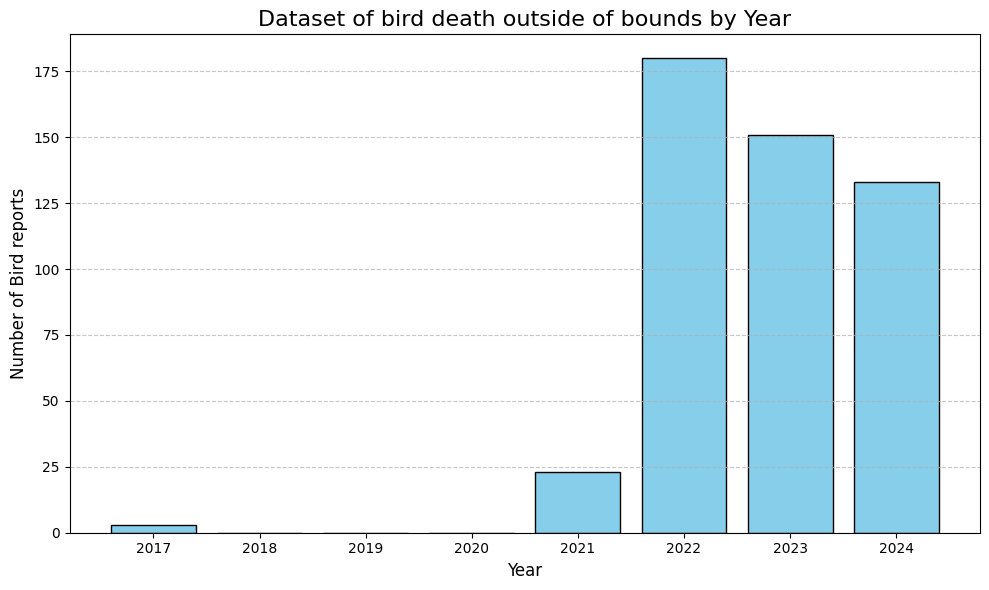

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Folder to save the yearly CSV files
output_folder = "yearly_data"

sizes = []

# Calculate the size (number of rows) for each CSV file
for year in range(2017, 2025):
    filepath = os.path.join(output_folder, f'dbird_data_{year}.csv')  # Update path to include folder
    
    tmeancalc = pd.read_csv(filepath)
    sizes.append(len(tmeancalc))  # Add the number of rows to the sizes list
years = list(range(2017, 2025))
mean_size = sum(sizes) / len(sizes)
mean_exsize = sum(sizes[4:]) / len(sizes[4:])
outliers_ex = np.std(sizes[4:])

# Create a bar chart for dataset sizes
plt.figure(figsize=(10, 6))
plt.bar(years, sizes, color='skyblue', edgecolor='black')
plt.title("Dataset of bird death outside of bounds by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Bird reports", fontsize=12)
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
# Split the data into monthly CSV files
output_folder = "Monthly_yearly_data"
# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

for year in range(2017, 2025):
    for month in range(1, 13):
        # Filter for the current year and month
        month_df = df1[(df1['year'] == year) & (df1['observed_at_utc'].dt.month == month)]
        
        # Skip if there's no data for the current month
        if month_df.empty:
            continue
        
        # Create the file path
        output_file = os.path.join(output_folder, f'dbird_data_{year}_{month:02d}.csv')
        
        # Save to a CSV file
        month_df.to_csv(output_file, index=False)

print("Success: Saved data for 2017-2024 by month.")

Success: Saved data for 2017-2024 by month.


In [8]:
import pandas as pd
import os

print("Within bounds by month")
print("")
# Folder containing the monthly data
input_folder = "Monthly_yearly_data"

# Initialize a dictionary to store the sizes for each month
monthly_sizes = {}

# Loop through the monthly files and collect sizes
for file_name in os.listdir(input_folder):
    if file_name.endswith(".csv") and "_" in file_name:  # Ensure it's a monthly file
        parts = file_name.split('_')
        
        # Check if the file name has at least four parts
        if len(parts) < 4:
            print(f"Skipping file with unexpected format: {file_name}")
            continue
        
        try:
            # Extract year and month from the file name
            year = parts[2]
            month = parts[3].split('.')[0]
            
            # Load the CSV file
            file_path = os.path.join(input_folder, file_name)
            df = pd.read_csv(file_path)
            
            # Add the size to the dictionary
            key = f"{year}-{int(month):02d}"  # Format as "YYYY-MM"
            monthly_sizes[key] = len(df)
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

# Convert the sizes to a DataFrame for easier calculations
sizes_df = pd.DataFrame(list(monthly_sizes.items()), columns=["Month", "Size"])
sizes_df['Month'] = pd.to_datetime(sizes_df['Month'], format='%Y-%m')

# Sort by Month for clarity
sizes_df = sizes_df.sort_values(by="Month")

# Calculate statistics
mean_size = sizes_df['Size'].mean()
std_deviation = sizes_df['Size'].std()
sample_size = sizes_df.shape[0]  # Number of months (data points)

# Output the results
print(f"Sample size (number of months): {sample_size}")
print(f"Mean size of datasets (monthly): {mean_size}")
print(f"Standard deviation of dataset sizes (monthly): {std_deviation}")




Within bounds by month

Sample size (number of months): 41
Mean size of datasets (monthly): 11.951219512195122
Standard deviation of dataset sizes (monthly): 16.502956128391354


In [ ]:
print("outside bounds by month" )
print("")
# Load the data into a DataFrame
df = pd.read_csv("dbird_2024_within_bounds.csv")

# Convert the 'observed_at_utc' column to datetime
df['observed_at_utc'] = pd.to_datetime(df['observed_at_utc'])

# Extract the year and month
df['year_month'] = df['observed_at_utc'].dt.to_period('M')

# Group by month and count the number of records
monthly_counts = df.groupby('year_month').size().reset_index(name='count')

# Calculate mean and standard deviation
mean_count = monthly_counts['count'].mean()
std_dev_count = monthly_counts['count'].std()

# Print results
print("Mean count of observations per month:", mean_count)
print("Standard deviation of observations per month:", std_dev_count)

# Display the monthly counts
print("\nMonthly counts:")
print(monthly_counts)

outside bounds

Mean count of observations per month: 1.8333333333333333
Standard deviation of observations per month: 1.1690451944500122

Monthly counts:
  year_month  count
0    2022-10      2
1    2023-01      1
2    2023-04      2
3    2023-08      1
4    2024-02      4
5    2024-09      1


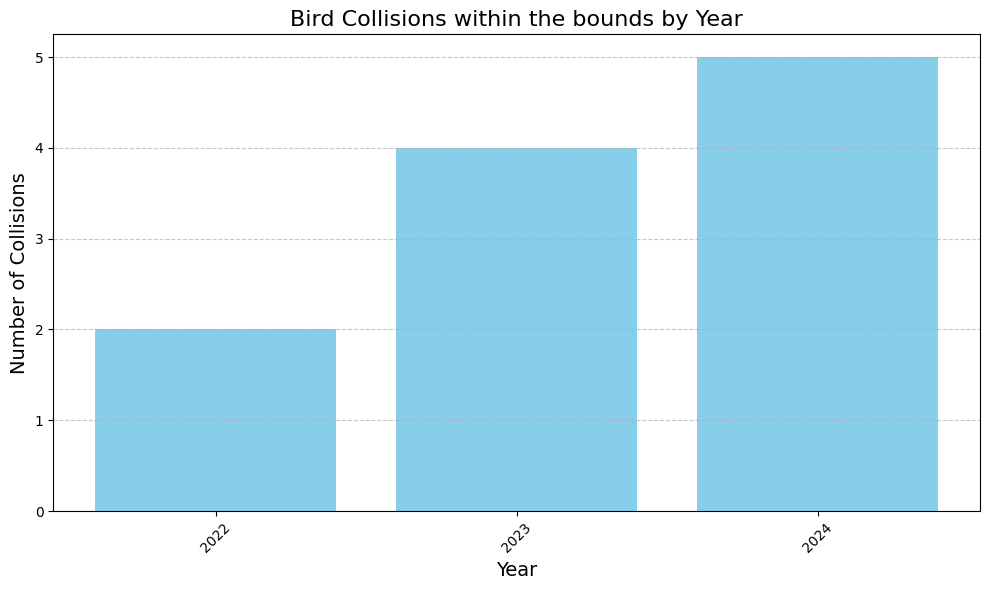

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file (replace 'file.csv' with your file's name)
data = pd.read_csv('dbird_2024_within_bounds.csv')

# Step 2: Convert 'observed_at_utc' to datetime format
data['observed_at_utc'] = pd.to_datetime(data['observed_at_utc'])

# Step 3: Extract year and month from the 'observed_at_utc' column
data['Year'] = data['observed_at_utc'].dt.year

# Step 4: Ensure the data is sorted by year and month
data = data.sort_values(by=['Year'])

# Step 5: Group data by year and count occurrences per year
collisions_per_year = data.groupby('Year').size()

# Step 6: Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(collisions_per_year.index, collisions_per_year.values, color='skyblue')

# Step 7: Customize the chart
plt.title('Bird Collisions within the bounds by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.xticks(collisions_per_year.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 8: Display the chart
plt.tight_layout()
plt.show()

## Calculating the bird Species (df2) (Extra)

In [28]:
import pandas as pd

file_path = "updated_dbird.csv"

df2 = pd.read_csv(file_path)

cleaned_df = df2[(df2["common_name"]!='unknown' )]

bird_counts = cleaned_df['common_name'].value_counts()

print(bird_counts)

common_name
Ovenbird                   44
Tennessee Warbler          28
Gray Catbird               22
American Robin             21
Swainson's Thrush          19
                           ..
White-breasted Nuthatch     1
Dark-eyed Junco             1
Carolina Chickadee          1
Red-shouldered Hawk         1
Hooded Warbler              1
Name: count, Length: 70, dtype: int64


# Calculate by Year which half has more collisions (data for Q3)

In [29]:
import pandas as pd
import os


# Folder to save the yearly CSV files
output_folder = "yearly_data"
Half1_folder = "yearly_data_spring"
Half2_folder = "yearly_data_Fall"


# Create the folder if it doesn't exist
os.makedirs(Half1_folder, exist_ok=True)
os.makedirs(Half2_folder, exist_ok=True)

for year in range(2017, 2025):
    filepath = os.path.join(output_folder, f'dbird_data_{year}.csv')  # Path to the yearly file
    
    try:
        # Read the file
        current_file = pd.read_csv(filepath)

        # Ensure the observed_at_utc is in datetime format
        current_file['observed_at_utc'] = pd.to_datetime(current_file['observed_at_utc'])

        # Filter for months 1-6 (Spring)
        first_half = current_file[current_file['observed_at_utc'].dt.month.isin(range(1, 7))]
        spring_output_file = os.path.join(Half1_folder, f'dbird_data_{year}_spring.csv')
        first_half.to_csv(spring_output_file, index=False)  # Save spring data to CSV

        # Filter for months 7-12 (Fall)
        second_half = current_file[current_file['observed_at_utc'].dt.month.isin(range(7, 13))]
        fall_output_file = os.path.join(Half2_folder, f'dbird_data_{year}_fall.csv')
        second_half.to_csv(fall_output_file, index=False)  # Save fall data to CSV


    except FileNotFoundError:
        print(f"File for year {year} not found at {filepath}. Skipping...")
    except Exception as e:
        print(f"An error occurred while processing year {year}: {e}")



Spring (Months 1-6):
Sizes: [0, 0, 0, 0, 1, 41, 52, 39]
Mean: 16.625
Mean cleaned: 16.625
Median: 0.5
Standard Deviation: 22.977862016670368
Standard Deviation: 22.246722605064026 (cleaned)


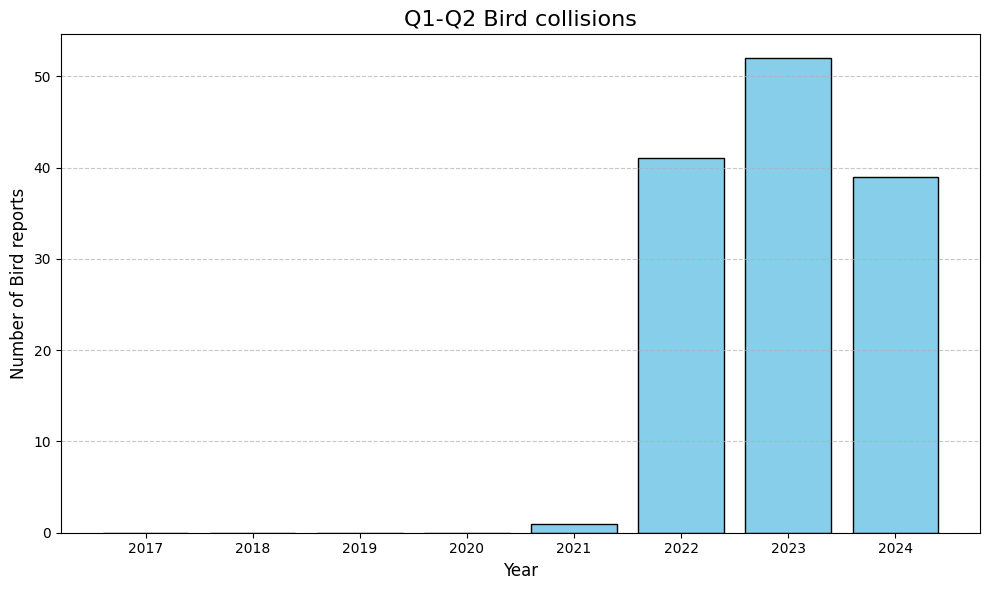

Fall (Months 7-12):
Sizes: [3, 0, 0, 0, 22, 139, 99, 94]
Mean: 44.625
Mean cleaned: 44.25
Median: 12.5
Standard Deviation: 56.7197055704629
Standard Deviation: 48.692915295759406 (cleaned)


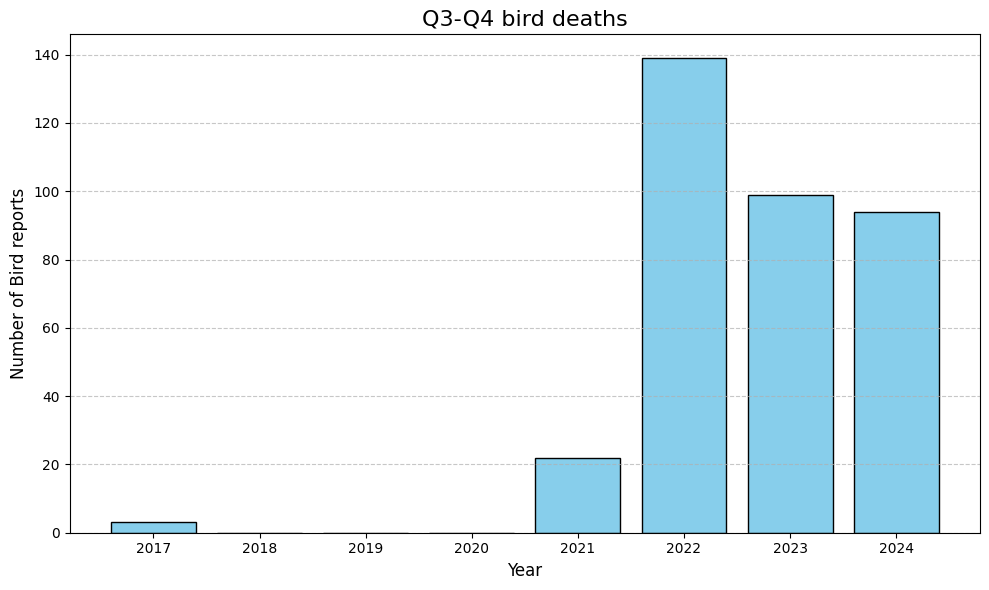

In [17]:
import matplotlib.pyplot as plt

# Folders to save the yearly CSV files
output_folder = "yearly_data"
Half1_folder = "yearly_data_spring"
Half2_folder = "yearly_data_fall"

# Initialize lists to store the sizes of each half's datasets
spring_sizes = []
fall_sizes = []

# Process each year's data
for year in range(2017, 2025):
    filepath = os.path.join(output_folder, f'dbird_data_{year}.csv')  # Path to the yearly file
    
    try:
        # Read the file
        current_file = pd.read_csv(filepath)

        # Ensure the observed_at_utc is in datetime format
        current_file['observed_at_utc'] = pd.to_datetime(current_file['observed_at_utc'])

        # Filter for months 1-6 (Spring)
        spring_data = current_file[current_file['observed_at_utc'].dt.month.isin(range(1, 7))]
        spring_sizes.append(len(spring_data))  # Store size of the spring dataset

        # Filter for months 7-12 (Fall)
        fall_data = current_file[current_file['observed_at_utc'].dt.month.isin(range(7, 13))]
        fall_sizes.append(len(fall_data))  # Store size of the fall dataset

    except FileNotFoundError:
        print(f"File for year {year} not found at {filepath}. Skipping...")
    except Exception as e:
        print(f"An error occurred while processing year {year}: {e}")

# Calculate statistics for Spring (Months 1-6)
spring_mean = sum(spring_sizes) / len(spring_sizes) 
spring_median = pd.Series(spring_sizes).median() 

# Calculate statistics for Fall (Months 7-12)
fall_mean = sum(fall_sizes) / len(fall_sizes) 
fall_median = pd.Series(fall_sizes).median() 

if len(sizes) > 4:
    Spring_outliers_ex = pd.Series(spring_sizes[4:]).std()
else:
    Spring_outliers_ex = 0
    
if len(sizes) > 4:
    Fall_outliers_ex = pd.Series(fall_sizes[4:]).std()
else:
    Fall_outliers_ex = 0


SPmean_exsize = sum(spring_sizes[4:]) / len(spring_sizes)
FALLmean_exsize = sum(fall_sizes[4:]) / len(fall_sizes)
# Output results
print("Spring (Months 1-6):")
print(f"Sizes: {spring_sizes}")
print(f"Mean: {spring_mean}")
print(f"Mean cleaned: {SPmean_exsize}")
print(f"Median: {spring_median}")
print(f"Standard Deviation: {pd.Series(spring_sizes).std()}")
print(f"Standard Deviation: {Spring_outliers_ex} (cleaned)")

sizes = spring_sizes


years = list(range(2017, 2025))
mean_size = sum(sizes) / len(sizes)


# Create a bar chart for dataset sizes
plt.figure(figsize=(10, 6))
plt.bar(years, sizes, color='skyblue', edgecolor='black')
plt.title("Q1-Q2 Bird collisions", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Bird reports", fontsize=12)
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("Fall (Months 7-12):")
print(f"Sizes: {fall_sizes}")
print(f"Mean: {fall_mean}")
print(f"Mean cleaned: {FALLmean_exsize}")
print(f"Median: {fall_median}")
print(f"Standard Deviation: {pd.Series(fall_sizes).std()}")
print(f"Standard Deviation: {Fall_outliers_ex} (cleaned)")

sizes = fall_sizes


years = list(range(2017, 2025))
mean_size = sum(sizes) / len(sizes)


# Create a bar chart for dataset sizes
plt.figure(figsize=(10, 6))
plt.bar(years, sizes, color='skyblue', edgecolor='black')
plt.title("Q3-Q4 bird deaths", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Bird reports", fontsize=12)
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Data fro Q4

Spring (Months Feb-Jun):
Sizes: [0, 0, 0, 0, 1, 39, 49, 37]
Mean: 15.75
Mean cleaned: 15.75
Median: 0.5
Standard Deviation: 20.33316256758894
Standard Deviation (cleaned): 20.33316256758894


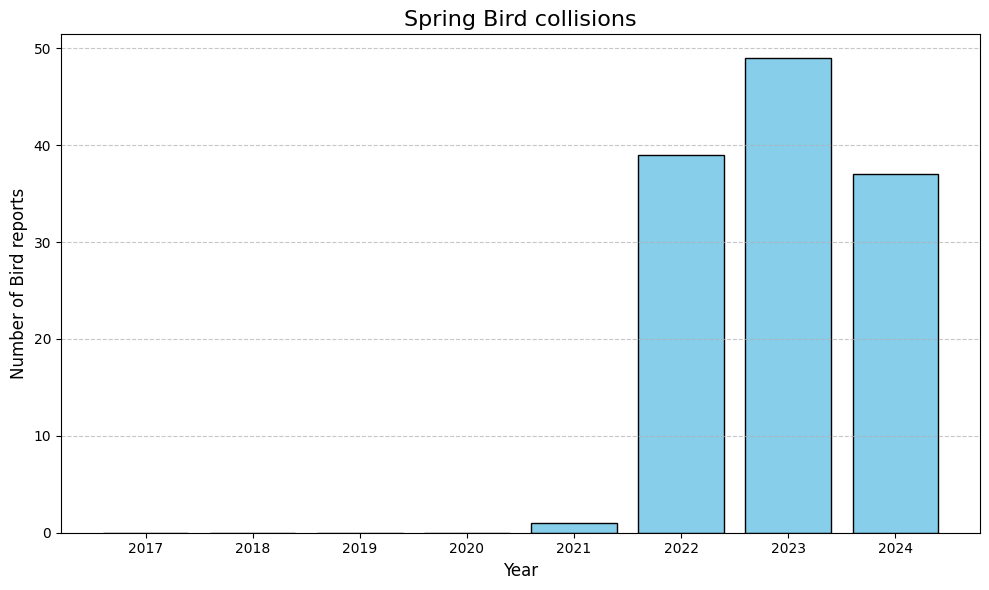

Fall (Months Aug-Nov):
Sizes: [3, 0, 0, 0, 18, 132, 93, 92]
Mean: 42.25
Mean cleaned: 42.25
Median: 10.5
Standard Deviation: 50.73152373031979
Standard Deviation (cleaned): 50.73152373031979


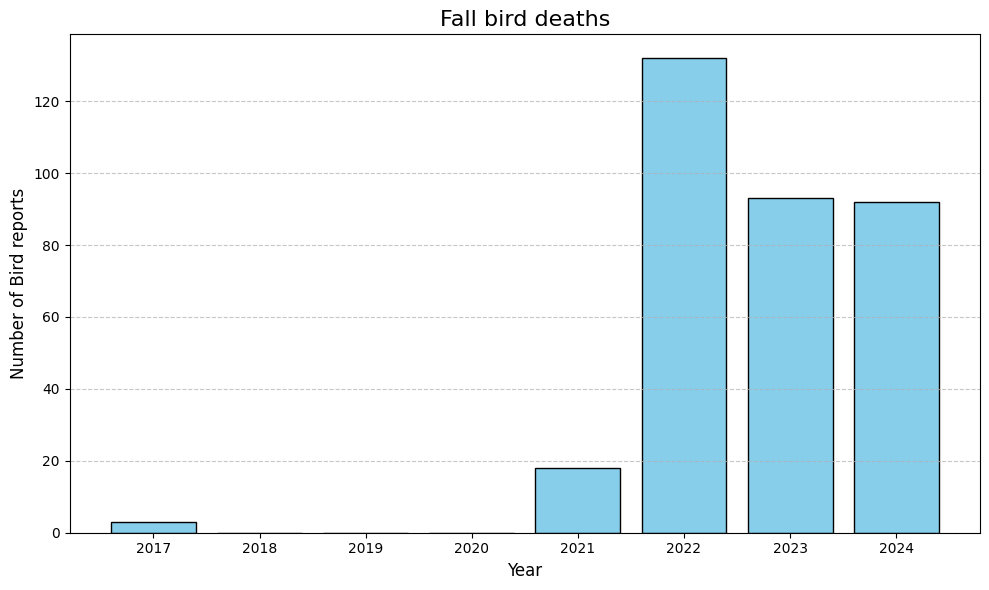

In [18]:
import pandas as pd
import os
import numpy as np

# Folder to save the yearly CSV files
output_folder = "yearly_data"
Half1_folder = "yearly_data_spring"
Half2_folder = "yearly_data_fall"

# Create the folder if it doesn't exist
os.makedirs(Half1_folder, exist_ok=True)
os.makedirs(Half2_folder, exist_ok=True)

# Initialize lists to store sizes for spring and fall datasets
spring_sizes = []
fall_sizes = []

for year in range(2017, 2025):
    filepath = os.path.join(output_folder, f'dbird_data_{year}.csv')  # Path to the yearly file
    
    try:
        # Read the file
        current_file = pd.read_csv(filepath)

        # Ensure the observed_at_utc is in datetime format
        current_file['observed_at_utc'] = pd.to_datetime(current_file['observed_at_utc'])

        # Filter for months 2-6 (Spring)
        first_half = current_file[current_file['observed_at_utc'].dt.month.isin(range(2, 7))]
        spring_output_file = os.path.join(Half1_folder, f'dbird_data_{year}_spring.csv')
        first_half.to_csv(spring_output_file, index=False)  # Save spring data to CSV
        spring_sizes.append(len(first_half))  # Store the size of the spring data

        # Filter for months 8-11 (Fall)
        second_half = current_file[current_file['observed_at_utc'].dt.month.isin(range(8, 12))]
        fall_output_file = os.path.join(Half2_folder, f'dbird_data_{year}_fall.csv')
        second_half.to_csv(fall_output_file, index=False)  # Save fall data to CSV
        fall_sizes.append(len(second_half))  # Store the size of the fall data

    except FileNotFoundError:
        print(f"File for year {year} not found at {filepath}. Skipping...")
    except Exception as e:
        print(f"An error occurred while processing year {year}: {e}")

# Spring statistics
spring_mean = np.mean(spring_sizes)
spring_median = np.median(spring_sizes)
spring_std = np.std(spring_sizes)

# Clean spring data (removing outliers)
spring_cleaned = [size for size in spring_sizes if abs(size - spring_mean) <= 2 * spring_std]
SPmean_exsize = np.mean(spring_cleaned)
Spring_outliers_ex = np.std(spring_cleaned)

# Fall statistics
fall_mean = np.mean(fall_sizes)
fall_median = np.median(fall_sizes)
fall_std = np.std(fall_sizes)

# Clean fall data (removing outliers)
fall_cleaned = [size for size in fall_sizes if abs(size - fall_mean) <= 2 * fall_std]
FALLmean_exsize = np.mean(fall_cleaned)
Fall_outliers_ex = np.std(fall_cleaned)

# Print the statistics
print("Spring (Months Feb-Jun):")
print(f"Sizes: {spring_sizes}")
print(f"Mean: {spring_mean}")
print(f"Mean cleaned: {SPmean_exsize}")
print(f"Median: {spring_median}")
print(f"Standard Deviation: {spring_std}")
print(f"Standard Deviation (cleaned): {Spring_outliers_ex}")

sizes = spring_sizes


years = list(range(2017, 2025))
mean_size = sum(sizes) / len(sizes)


# Create a bar chart for dataset sizes
plt.figure(figsize=(10, 6))
plt.bar(years, sizes, color='skyblue', edgecolor='black')
plt.title("Spring Bird collisions", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Bird reports", fontsize=12)
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("Fall (Months Aug-Nov):")
print(f"Sizes: {fall_sizes}")
print(f"Mean: {fall_mean}")
print(f"Mean cleaned: {FALLmean_exsize}")
print(f"Median: {fall_median}")
print(f"Standard Deviation: {fall_std}")
print(f"Standard Deviation (cleaned): {Fall_outliers_ex}")

sizes = fall_sizes


years = list(range(2017, 2025))
mean_size = sum(sizes) / len(sizes)


# Create a bar chart for dataset sizes
plt.figure(figsize=(10, 6))
plt.bar(years, sizes, color='skyblue', edgecolor='black')
plt.title("Fall bird deaths", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Bird reports", fontsize=12)
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

File for year 2016 not found at yearly_data\dbird_data_2016.csv. Skipping...
Year-Round (Months Jan-Dec):
Sizes: [3, 0, 0, 0, 23, 180, 151, 133]
Mean: 61.25
Mean cleaned: 61.25
Median: 13.0
Standard Deviation: 73.66775074617115
Standard Deviation (cleaned): 73.66775074617115


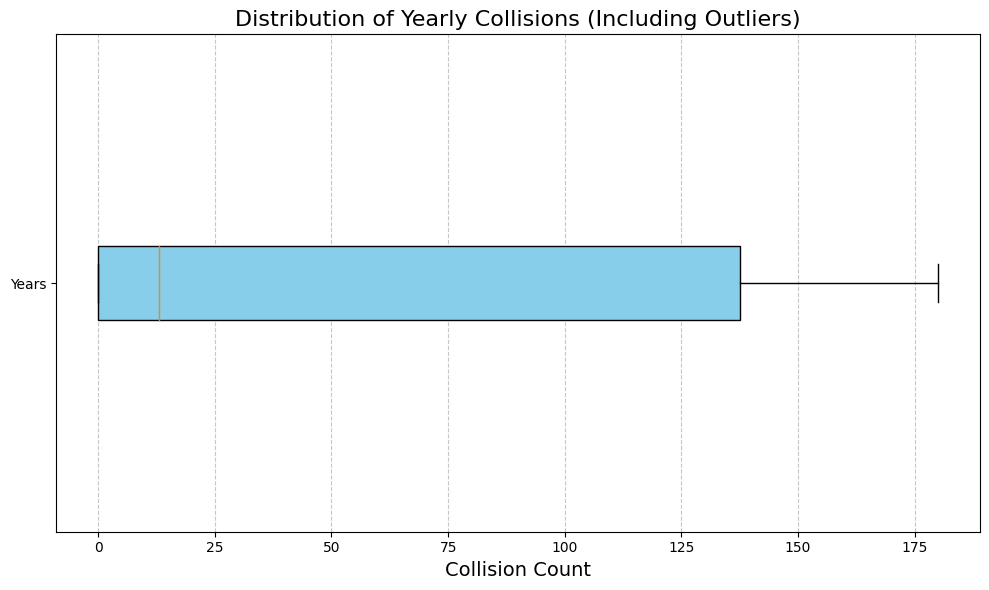

In [16]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Folder to save the yearly CSV files
output_folder = "yearly_data"
year_round_folder = "year_round_data"

# Create the folder if it doesn't exist
os.makedirs(year_round_folder, exist_ok=True)

# Initialize a list to store sizes for the year-round dataset
year_round_sizes = []

for year in range(2016, 2025):
    filepath = os.path.join(output_folder, f'dbird_data_{year}.csv')  # Path to the yearly file
    
    try:
        # Read the file
        current_file = pd.read_csv(filepath)

        # Ensure the observed_at_utc is in datetime format
        current_file['observed_at_utc'] = pd.to_datetime(current_file['observed_at_utc'])

        # Filter for all months (January to December)
        year_round_data = current_file
        year_round_output_file = os.path.join(year_round_folder, f'dbird_data_{year}_year_round.csv')
        year_round_data.to_csv(year_round_output_file, index=False)  # Save year-round data to CSV
        year_round_sizes.append(len(year_round_data))  # Store the size of the year-round data

    except FileNotFoundError:
        print(f"File for year {year} not found at {filepath}. Skipping...")
    except Exception as e:
        print(f"An error occurred while processing year {year}: {e}")

# Year-round statistics
year_round_mean = np.mean(year_round_sizes)
year_round_median = np.median(year_round_sizes)
year_round_std = np.std(year_round_sizes)

# Clean year-round data (removing outliers)
year_round_cleaned = [size for size in year_round_sizes if abs(size - year_round_mean) <= 2 * year_round_std]
YearRound_mean_exsize = np.mean(year_round_cleaned)
YearRound_outliers_ex = np.std(year_round_cleaned)

# Print the statistics
print("Year-Round (Months Jan-Dec):")
print(f"Sizes: {year_round_sizes}")
print(f"Mean: {year_round_mean}")
print(f"Mean cleaned: {YearRound_mean_exsize}")
print(f"Median: {year_round_median}")
print(f"Standard Deviation: {year_round_std}")
print(f"Standard Deviation (cleaned): {YearRound_outliers_ex}")

# Boxplot to visualize the data (including outliers)
plt.figure(figsize=(10, 6))
plt.boxplot(
    year_round_sizes, 
    vert=False, 
    patch_artist=True, 
    boxprops=dict(facecolor='skyblue'),
    flierprops=dict(marker='o', color='red', markersize=8)  # Customize outlier appearance
)

# Customize the chart
plt.title('Distribution of Yearly Collisions (Including Outliers)', fontsize=16)
plt.xlabel('Collision Count', fontsize=14)
plt.yticks([1], ['Years'])  # Single category for years
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

